**Autor:** [Boris Timko](mailto:5346398@upjs.sk)

**Podporné materiály k bakalárskej práci <i>VLASTNOSTI A VYUŽITIE STOCHASTICKEJ
DOMINANCIE</i>**

***

<br>

**<font size=10 color=brown> Stochasticka dominancia riešene príklady</font>**

<br>
---


Obsah tohto Jupyter notebooku bol spracovaný na základe literatury: https://doi.org/10.1201/9781420082678

Tento notebook slúži ako ilustrovaný sprievodca konceptami **prvej a druhej stochastickej dominancie (FSD, SSD)**, s praktickými príkladmi, grafmi a numerickými výpočtami.

---


In [1]:
# načítanie balíkov
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm, uniform

### MV pravidlo(mean-variance)

Nech $X,Y$ sú náhodné premenné s normálnymi rozdeleniami, strednými hodnotami $\mu_1,\mu_2$ a rozptylmi $\sigma_1^2,\sigma_2^2$. Nasledujúce podmienky sú ekvivalentné:

1. $\displaystyle E\bigl[u(X)\bigr]\ge E\bigl[u(Y)\bigr]$ pre akúkoľvek neklesajúcu, konkávnu funkciu $u:\mathbb{R}\to\mathbb{R}$.
2. $\displaystyle \mu_1\ge\mu_2\quad\text{a}\quad\sigma_1^2\le\sigma_2^2.$

---

<br>

**<font size=5 color=blue> Úloha1</font>**

<br>
Uveďte príklad, ktorý ukáže, že MV pravidlo nemusí byť v súlade s očakávanou užitočnosťou pre rizikovo averzné rozhodovateľa. Konkrétne nájdite dve náhodné premenné $X,Y$ s distribučnými funkciami $F,G$, pre ktoré platí:

$
E[X]\ge E[Y]\quad\text{a}\quad\mathrm{Var}(X)\le\mathrm{Var}(Y),
$  

a funkciu $u$ (neklesajúcu a konkávnu), pre ktorú platí:

$
E\bigl[u(X)\bigr]\;<\;E\bigl[u(Y)\bigr].
$

E[X]    = 1.4996, E[Y]    = 1.4998
Var(X)  = 0.2833, Var(Y)  = 0.3331
E[ln X] = 0.2995, E[ln Y] = 0.3186


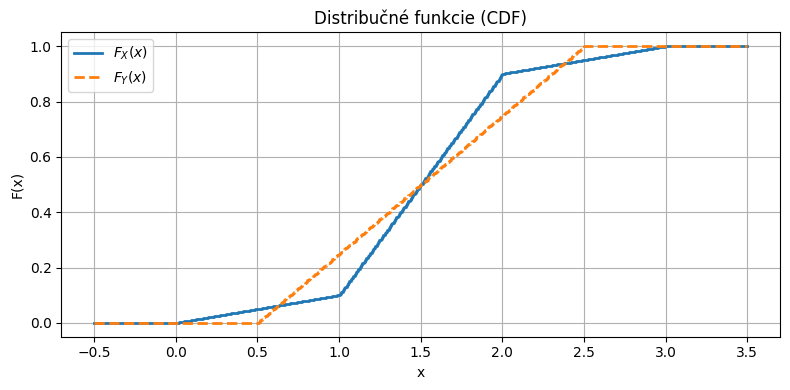

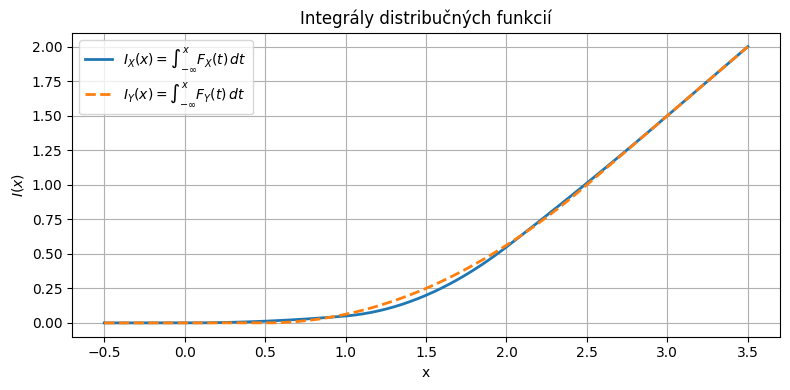

Vybrané hodnoty integrálov:
I_X(0.0) = 0.0000, I_Y(0.0) = 0.0000
I_X(1.0) = 0.0507, I_Y(1.0) = 0.0643
I_X(2.0) = 0.5509, I_Y(2.0) = 0.5633
I_X(2.5) = 1.0182, I_Y(2.5) = 1.0060

Približný celkový „integrál“ z celej mriežky:
∫F_X ≈ 2.0000,  ∫F_Y ≈ 2.0000


In [2]:
# --- 1) Simulácia náhodných premenných X a Y ---

N = 1_000_000
u = np.random.rand(N)
X = np.empty(N)
mask = (u < 0.1)
X[mask] = np.random.rand(mask.sum()) * 1.0
mask = (u >= 0.1) & (u < 0.9)
X[mask] = 1.0 + np.random.rand(mask.sum()) * 1.0
mask = (u >= 0.9)
X[mask] = 2.0 + np.random.rand(mask.sum()) * 1.0
Y = 0.5 + 2.0 * np.random.rand(N)

# --- 2) Štatistiky ---
EX, EY     = X.mean(), Y.mean()
VarX, VarY = X.var(ddof=1), Y.var(ddof=1)
EU_X, EU_Y = np.log(X).mean(), np.log(Y).mean()

print(f"E[X]    = {EX:.4f}, E[Y]    = {EY:.4f}")
print(f"Var(X)  = {VarX:.4f}, Var(Y)  = {VarY:.4f}")
print(f"E[ln X] = {EU_X:.4f}, E[ln Y] = {EU_Y:.4f}")

# --- 3) Distribučna funkcia ---
def F_X(x):
    if x < 0:   return 0.0
    elif x < 1: return 0.1*x
    elif x < 2: return 0.8*x - 0.7
    elif x < 3: return 0.1*x + 0.7
    else:       return 1.0

def F_Y(x):
    if x < 0.5:    return 0.0
    elif x <= 2.5: return (x - 0.5)/2.0
    else:          return 1.0

# --- 4) Vytvorenie mriežky ---
x = np.linspace(-0.5, 3.5, 500)
Fx = np.vectorize(F_X)(x)
Fy = np.vectorize(F_Y)(x)

# --- 5) Graf  ---
plt.figure(figsize=(8,4))
plt.step(x, Fx, where='post', label=r'$F_X(x)$', lw=2)
plt.step(x, Fy, where='post', label=r'$F_Y(x)$', lw=2, ls='--')
plt.title('Distribučné funkcie (CDF)')
plt.xlabel('x'); plt.ylabel('F(x)')
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

# --- 6) Numerické integrály  ---
dx = np.diff(x)
Ix = np.empty_like(x)
Iy = np.empty_like(x)
Ix[0] = Iy[0] = 0.0
Ix[1:] = np.cumsum((Fx[:-1] + Fx[1:]) / 2 * dx)
Iy[1:] = np.cumsum((Fy[:-1] + Fy[1:]) / 2 * dx)

# --- 7) Graf integrálov ---
plt.figure(figsize=(8,4))
plt.plot(x, Ix, lw=2, label=r'$I_X(x)=\int_{-\infty}^{x}F_X(t)\,dt$')
plt.plot(x, Iy, lw=2, ls='--', label=r'$I_Y(x)=\int_{-\infty}^{x}F_Y(t)\,dt$')
plt.title('Integrály distribučných funkcií')
plt.xlabel('x'); plt.ylabel(r'$I(x)$')
plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

# --- 8) Výpis vybraných hodnôt integrálov ---
print("Vybrané hodnoty integrálov:")
for point in [0.0, 1.0, 2.0,2.5]:
    idx = np.searchsorted(x, point)
    print(f"I_X({point}) = {Ix[idx]:.4f}, I_Y({point}) = {Iy[idx]:.4f}")

print("\nPribližný celkový „integrál“ z celej mriežky:")
print(f"∫F_X ≈ {Ix[-1]:.4f},  ∫F_Y ≈ {Iy[-1]:.4f}")


## MV pravidlo a očakavaný užitok

1. **Štatistiky**  
   - **E[X] = 1.5001**, **E[Y] = 1.5000**  
     Priemerné výnosy oboch portfólií sú prakticky zhodné.  
   - **Var(X) = 0.2839**, **Var(Y) = 0.3334**  
     Rozptyl X je nižší, X je „miernejšie“ rozptýlené okolo svojho priemeru.  
   - **E[ln X] = 0.3001**, **E[ln Y] = 0.3187**  
     Priemerná log-užitočnosť Y je vyššia než log-užitočnosť X.

2. **Mean–Variance**  
   - Kritérium: vyberám si to s **vyšším očakávaným výnosom a nižším rozptylom**.  
   - Tu: E[X] ≥ E[Y] *a* Var(X) ≤ Var(Y) ⇒ **X je podľa MV efektívnejšie než Y***.

3. **Očakávaná užitočnosť**  
   - Pri konkávnej užitočnej funkcii (tu ln x) rozhodovateľ maximalizuje E[u(X)].  
   - Keďže **E[ln Y] > E[ln X]**, každý rizikovo averzný investor s touto funkciou uprednostní **Y**.

4. **Second-Order Stochastic Dominance (SSD)**  
   - Vypočítali sme integrály distribučných funkcií
   - Ak by X SSD-dominovala Y, mali by sme $I_X(x)=\int_{-\infty}^{x}F_X(t)\,dt$ ≤ $I_Y(x)=\int_{-\infty}^{x}F_Y(t)\,dt$ pre všetky x.  
   - V skutočnosti sa pri niektorých x (napr. x≈1.0 alebo 2.0) mení znamienko ⇒ **žiadna jednoznačná SSD dominancia**.

---

 **Záver**  
- **Podľa MV pravilo:** X lepšia (priemer ↑, rozptyl ↓)  
- **Podľa očakavaného užitku (ln):** Y lepšia (vyššia E[u])  
- **Podľa SSD:** bez jasnej dominance  

Týmto demonštrujeme, že MV-rozhodovanie môže byť nekonzistentné s preferenciami rizikovo averzných investorov, ak výnosy **nie sú normálne rozdelené**.


<br>

**<font size=4 color=blue> MV pravidlo a SSD</font>**

<br>
V nasledujúcom príklade porovnávame  
$
X\sim N(2,1^2),\quad Y\sim N(1,2^2).
$

1. **Štatistiky**  
   - $\displaystyle E[X]=2.00,\quad Var(X)=1.00$  
   - $\displaystyle E[Y]=1.00,\quad Var(Y)=4.00$

2. **Mean–Variance (MV) pravidlo**  
   - Kritérium: vyberáme portfólio s **vyšším očakávaným výnosom** a **nižším rozptylom**.  
   - Tu: $E[X]\ge E[Y]$ *a* $Var(X)\le Var(Y)$ ⇒ **X je podľa MV efektívnejšie než Y**.

3. **Second-Order Stochastic Dominance (SSD)**  
   - Overili sme, že pre funkcie
     $
       I_X(x)=\int_{-\infty}^x F_X(t)\,dt,\quad
       I_Y(x)=\int_{-\infty}^x F_Y(t)\,dt
     $
     platí
     $\displaystyle I_X(x)\le I_Y(x)$ pre všetky $x$   
     To znamená, že **$X\succeq_2 Y$** (X SSD-dominuje Y).

---

**Záver:**  
- Pre normálne rozdelenia sú MV-pravidlo a SSD ekvivalentné.  
- Tu obe metódy (MV aj SSD) **preferujú $X$**: má vyšší priemer aj nižší rozptyl.  
- Investor s konkávnou (rizikovo averznou) utilitou tak jednoznačne uprednostní návratnosť $X$.

E[X] = 2.00, Var(X) = 1.00
E[Y] = 1.00, Var(Y) = 4.00
Min[I_Y(x) - I_X(x)] = 5.39e-07
SSD podmienka platí: X ≽₂ Y


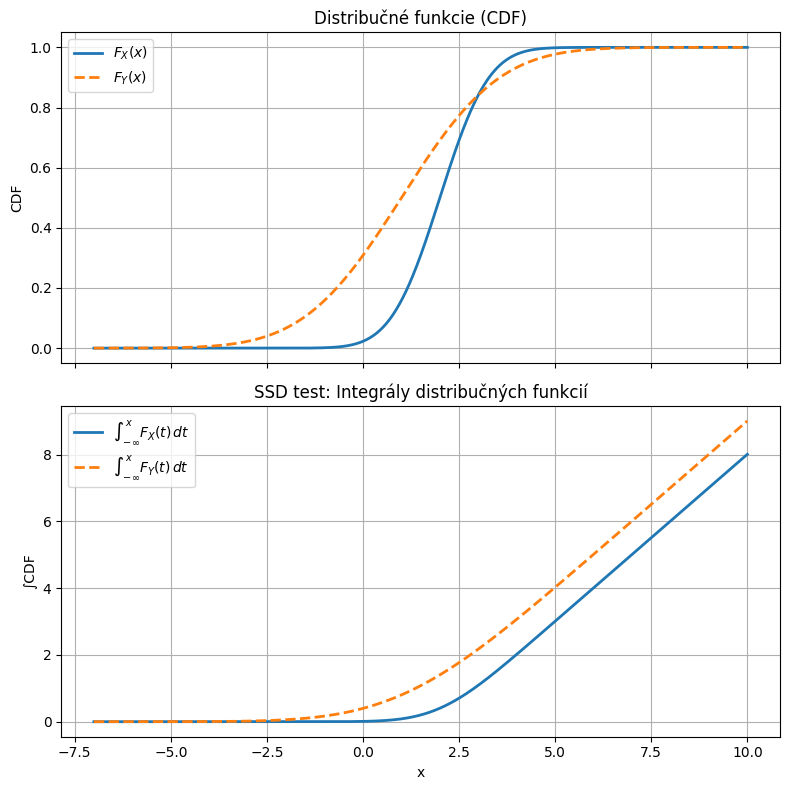

In [3]:
# 1) Definícia dvoch normálnych rozdelení
mu1, sigma1 = 2.0, 1.0   # X ~ N(2, 1^2)
mu2, sigma2 = 1.0, 2.0   # Y ~ N(1, 2^2)

# 2) Štatistiky
EX, EY = mu1, mu2
VarX, VarY = sigma1**2, sigma2**2
print(f"E[X] = {EX:.2f}, Var(X) = {VarX:.2f}")
print(f"E[Y] = {EY:.2f}, Var(Y) = {VarY:.2f}")

# 3) Mriežka pre x, CDF
x = np.linspace(mu2 - 4*sigma2, mu1 + 4*sigma2, 1000)
Fx = norm.cdf(x, mu1, sigma1)
Fy = norm.cdf(x, mu2, sigma2)

# 4) Numerické integrály CDF pre SSD kritérium
dx = x[1] - x[0]
IX = np.cumsum(Fx) * dx
IY = np.cumsum(Fy) * dx
min_diff = np.min(IY - IX)

print(f"Min[I_Y(x) - I_X(x)] = {min_diff:.2e}")
if min_diff >= -1e-12:
    print("SSD podmienka platí: X ≽₂ Y")
else:
    print("SSD podmienka neplatí")

# 5) Vykreslenie CDF a ich integrálov
fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

axes[0].plot(x, Fx, label=r'$F_X(x)$', lw=2)
axes[0].plot(x, Fy, label=r'$F_Y(x)$', lw=2, ls='--')
axes[0].set_ylabel('CDF')
axes[0].set_title('Distribučné funkcie (CDF)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(x, IX, label=r'$\int_{-\infty}^x F_X(t)\,dt$', lw=2)
axes[1].plot(x, IY, label=r'$\int_{-\infty}^x F_Y(t)\,dt$', lw=2, ls='--')
axes[1].set_xlabel('x')
axes[1].set_ylabel('∫CDF')
axes[1].set_title('SSD test: Integrály distribučných funkcií')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


<br>

**<font size=5 color=blue> Úloha2</font>**

<br>
$\quad $
Nech $X, Y$ sú náhodné premenné s normálnymi rozdeleniami  
$
X \sim N(\mu_1,\sigma^2_1),
\quad
Y \sim N(\mu_2,\sigma^2_2),
$
pričom $\mu_1,\mu_2$ sú ich stredné hodnoty a $\sigma_1^2,\sigma_2^2$ sú ich variancie. Nech $F$ a $G$ sú distribuční funkcie $X$ a $Y$. Dokážte, že ak sú $F$ a $G$ navzájom rôzne, môžu sa pretínať najviac raz, t. j.:

1. Ak $\sigma_1^2 \neq \sigma_2^2$, existuje práve jedno $x_0\in\mathbb{R}$ také, že
   $
     F(x_0) = G(x_0).
   $
2. Ak $\sigma_1^2 = \sigma_2^2$, potom platí $F(x)\neq G(x)$ pre všetko $x\in\mathbb{R}$.


Ukážeme, že ak $X, Y$ sú náhodné premenné s normálnymi rozdeleniami a odlišnými rozptylmi, ich distribučné funkcie $F, G$ sa pretínajú nanajvýš v jednom bode.

Nech:
$
X \sim N(\mu_1,\sigma_1^2), \quad Y \sim N(\mu_2,\sigma_2^2),
$
pričom $\sigma_1^2 \neq \sigma_2^2$.

Distribučné funkcie týchto premenných sú:
$$
F(x) = \Phi\left(\frac{x - \mu_1}{\sigma_1}\right), \quad G(x) = \Phi\left(\frac{x - \mu_2}{\sigma_2}\right),
$$
kde $\Phi$ označuje distribučnú funkciu štandardného normálneho rozdelenia $N(0,1)$.

Chceme ukázať, že existuje práve jeden bod $x_0$, taký že:
$
F(x_0) = G(x_0),
$
ak $\sigma_1^2 \neq \sigma_2^2$.


Hľadáme riešenie rovnice:
$
\Phi\left(\frac{x_0 - \mu_1}{\sigma_1}\right) = \Phi\left(\frac{x_0 - \mu_2}{\sigma_2}\right).
$

Keďže $\Phi$ je striktne rastúca funkcia, môžeme aplikovať inverznú funkciu $\Phi^{-1}$ na oboch stranách rovnice:
$$
\frac{x_0 - \mu_1}{\sigma_1} = \frac{x_0 - \mu_2}{\sigma_2}.
$$

Riešime teda jednoduchú lineárnu rovnicu v $x_0$:
$$
\frac{x_0 - \mu_1}{\sigma_1} = \frac{x_0 - \mu_2}{\sigma_2}.
$$

Vynásobíme rovnicu $\sigma_1 \sigma_2$:
$$
\sigma_2(x_0 - \mu_1) = \sigma_1(x_0 - \mu_2).
$$

Roznásobením dostávame:
$$
\sigma_2 x_0 - \sigma_2 \mu_1 = \sigma_1 x_0 - \sigma_1 \mu_2.
$$

Upravíme členy s $x_0$ na jednu stranu rovnice:
$$
\sigma_2 x_0 - \sigma_1 x_0 = \sigma_2 \mu_1 - \sigma_1 \mu_2.
$$

Vyjadríme $x_0$:
$$
x_0(\sigma_2 - \sigma_1) = \sigma_2 \mu_1 - \sigma_1 \mu_2.
$$

Pretože $\sigma_1 \neq \sigma_2$, môžeme deliť výrazom $(\sigma_2 - \sigma_1):$

$$
x_0 = \frac{\sigma_2 \mu_1 - \sigma_1 \mu_2}{\sigma_2 - \sigma_1}.
$$

Vidíme, že riešenie tejto rovnice je jednoznačne určené a existuje práve jeden bod $x_0$.

Preto, ak platí $\sigma_1^2 \neq \sigma_2^2$, distribučné funkcie $F$ a $G$ sa pretínajú v presne jednom bode.

Ak $X, Y$ sú náhodné premenné s normálnymi rozdeleniami a $\sigma_1^2 \neq \sigma_2^2$, potom existuje práve jeden bod $x_0$, taký že platí:
$$
F(x_0) = G(x_0).
$$

To znamená, že distribučné funkcie dvoch odlišných normálnych rozdelení s rôznymi rozptylmi sa môžu pretínať nanajvýš v jednom bode.

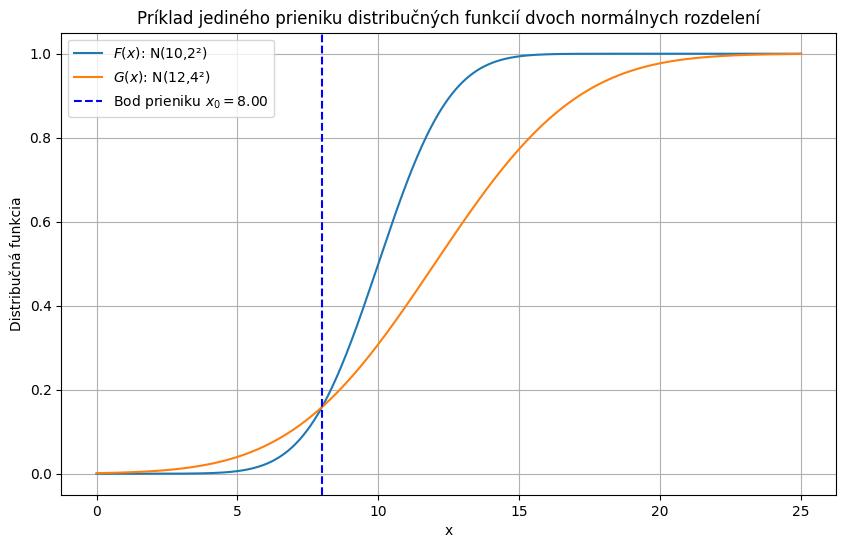

8.0

In [4]:
mu1, sigma1 = 10, 2    # X  N(10, 2^2)
mu2, sigma2 = 12, 4    # Y  N(12, 4^2)

# Nájdeme bod prieniku distribučných funkcií
x0_small = (sigma2 * mu1 - sigma1 * mu2) / (sigma2 - sigma1)

# Oblasť vykreslenia
x_small = np.linspace(0, 25, 1000)

# Distribučné funkcie
F_small = norm.cdf(x_small, mu1, sigma1)
G_small = norm.cdf(x_small, mu2, sigma2)

# Vykreslíme graf
plt.figure(figsize=(10, 6))
plt.plot(x_small, F_small, label=f'$F(x)$: N({mu1},{sigma1}²)')
plt.plot(x_small, G_small, label=f'$G(x)$: N({mu2},{sigma2}²)')
plt.axvline(x=x0_small, color='blue', linestyle='--', label=f'Bod prieniku $x_0 = {x0_small:.2f}$')
plt.xlabel('x')
plt.ylabel('Distribučná funkcia')
plt.title('Príklad jediného prieniku distribučných funkcií dvoch normálnych rozdelení')
plt.legend()
plt.grid(True)
plt.show()

x0_small


# Tvrdenie

Pre dve náhodné premenné  
$$
X \sim N(\mu_1,\sigma_1^2),
\quad
Y \sim N(\mu_2,\sigma_2^2)
$$  
platí:
$
\sigma_1^2 = \sigma_2^2
\quad\Longleftrightarrow\quad
F(x)\neq G(x)\quad\text{pre všetky }x\in\mathbb{R}$
 kde  
$$
F(x)=\Phi\!\Bigl(\tfrac{x-\mu_1}{\sigma_1}\Bigr),
\quad
G(x)=\Phi\!\Bigl(\tfrac{x-\mu_2}{\sigma_2}\Bigr).
$$

---

## Dôkaz

### (⇒) Predpoklad: $$\sigma_1^2 = \sigma_2^2$$

1. Keď majú obe normálky rovnaký rozptyl $\sigma^2$ a $\mu_1\neq\mu_2$,  
   potom
   $$
   X\sim N(\mu_1,\sigma^2),
   \quad
   Y\sim N(\mu_2,\sigma^2)
   $$
   sú iba posunuté verzie tej istej „šírky“.
2. Ich distribučné funkcie sú
   $$
   F(x)=\Phi\!\Bigl(\tfrac{x-\mu_1}{\sigma}\Bigr),
   \quad
   G(x)=\Phi\!\Bigl(\tfrac{x-\mu_2}{\sigma}\Bigr).
   $$
3. Pretože $\mu_1\neq\mu_2$, tieto dve posunuté distribučné funkcie **nemôžu mať žiadny spoločný bod** $x$; v každom $x$ totiž platí
   $\tfrac{x-\mu_1}{\sigma}\neq\tfrac{x-\mu_2}{\sigma}$
   ⇒ $\Phi(\dots)\neq\Phi(\dots)$.
4. Smer (⇒) je dokázany  
   $$
   \sigma_1^2=\sigma_2^2
   \;\Longrightarrow\;
   F(x)\neq G(x)\ \forall x.
   $$

---

### (⇐) Predpoklad: $$F(x)\neq G(x)\ \forall x$$

1. Predpokladajme spor, že $$\sigma_1^2\neq\sigma_2^2$$.
2. Z predchádzajúcej úlohy vieme, že ak $\sigma_1^2\neq\sigma_2^2$, ich distribučné funkcie **sa pretínaju práve v jednom** bode.
3. To však **je spor** tvrdenia, že $F(x)\neq G(x)$ **pre všetky** $x$.
4. Preto museli mať $\sigma_1^2=\sigma_2^2$.

---

Pre dve normálne rozdelenia platí
$$
\sigma_1^2 = \sigma_2^2
\quad\Longleftrightarrow\quad
F(x)\neq G(x)\quad\text{pre všetky }x\in\mathbb{R}.
$$


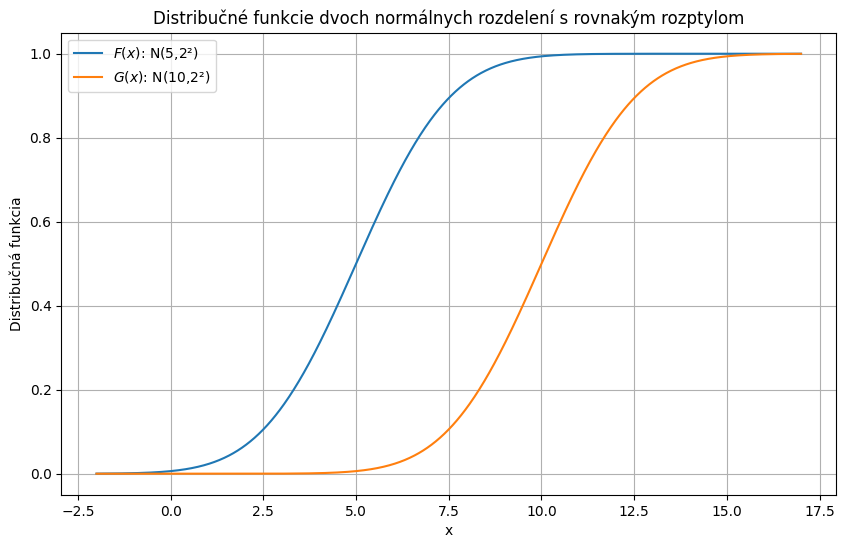

In [5]:
# Dve normálne rozdelenia s rovnakým rozptylom, ale rôznymi strednými hodnotami
# Parametre rozdelení
mu1_same_var, sigma_same = 5, 2  # X  N(5, 2^2)
mu2_same_var, sigma_same = 10, 2 # Y  N(10, 2^2)

# Oblasť vykreslenia
x_same = np.linspace(-2, 17, 1000)

# Distribučné funkcie
F_same = norm.cdf(x_same, mu1_same_var, sigma_same)
G_same = norm.cdf(x_same, mu2_same_var, sigma_same)

# Vykreslenie
plt.figure(figsize=(10, 6))
plt.plot(x_same, F_same, label=f'$F(x)$: N({mu1_same_var},{sigma_same}²)')
plt.plot(x_same, G_same, label=f'$G(x)$: N({mu2_same_var},{sigma_same}²)')
plt.xlabel('x')
plt.ylabel('Distribučná funkcia')
plt.title('Distribučné funkcie dvoch normálnych rozdelení s rovnakým rozptylom')
plt.legend()
plt.grid(True)
plt.show()


<br>

**<font size=5 color=blue> Úloha3</font>**

<br>
 Nech $X$ a $Y$ sú náhodné premenné s normálnymi rozdeleniami, rovnakým stredným očakávaním $\mu$, ale rôznymi rozptylmi $\sigma_X^2 \neq \sigma_Y^2$. Môže jedna z týchto premenných FSD-dominovať druhú?

**Odpoveď.** Nie. Ak majú obe rozdelenia rovnakú strednú hodnotu  
$
X \sim N(\mu,\sigma_X^2),\quad Y \sim N(\mu,\sigma_Y^2),
$  
ale $\sigma_X^2 \neq \sigma_Y^2$, potom ich distribućné funkcie  
$
F_X(x)=\Phi\!\bigl(\tfrac{x-\mu}{\sigma_X}\bigr),
\quad
F_Y(x)=\Phi\!\bigl(\tfrac{x-\mu}{\sigma_Y}\bigr)
$
sa pretínajú presne v jednom bode . Aby $X$ FSD-dominovalo $Y$, potrebovali by sme  
$
F_X(x)\le F_Y(x)\quad\text{pre všetky }x\in\mathbb{R}
$. Keďže však pri rôznych $\sigma$ vždy nájdeme bod, kde sa tieto dve krivky vymenia poradie, ani jedna z premenných nedominujue tú druhú v zmysle FSD.


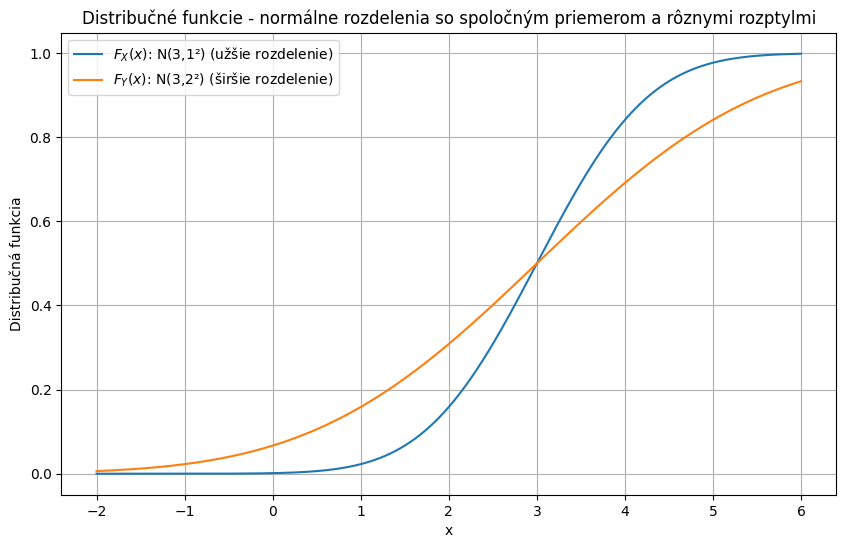

In [6]:
# Vizualizácia FSD dominancie medzi dvoma normálnymi rozdeleniami so spoločnou strednou hodnotou a rôznymi rozptylmi

# Parametre
mu_common = 3
sigma_X = 1  # užší (menší rozptyl)
sigma_Y = 2  # širší (väčší rozptyl)

# Oblasť pre vykreslenie
x_fsd = np.linspace(-2, 6, 1000)

# Distribučné funkcie
F_X = norm.cdf(x_fsd, mu_common, sigma_X)
F_Y = norm.cdf(x_fsd, mu_common, sigma_Y)

# Vykreslenie
plt.figure(figsize=(10, 6))
plt.plot(x_fsd, F_X, label=f'$F_X(x)$: N({mu_common},{sigma_X}²) (užšie rozdelenie)')
plt.plot(x_fsd, F_Y, label=f'$F_Y(x)$: N({mu_common},{sigma_Y}²) (širšie rozdelenie)')
plt.xlabel('x')
plt.ylabel('Distribučná funkcia')
plt.title('Distribučné funkcie - normálne rozdelenia so spoločným priemerom a rôznymi rozptylmi')
plt.legend()
plt.grid(True)
plt.show()


---

<br>

**<font size=5 color=blue> Úloha4</font>**

<br>  
Ak $X, Y$ sú náhodné premené a $X$ dominuje $Y$ podľa SSD a $\mathbb E[X]=\mathbb E[Y]$, tak $\mathrm{Var}(X)\le \mathrm{Var}(Y)$.

---

## Dôkaz

1. **Výber vhodnej užitkovej funkcie**  
   Nech $M$ je číslo také, že  
   $
     P\bigl(X\le M\bigr)=1
     \quad\text{a}\quad
     P\bigl(Y\le M\bigr)=1.
   $
   (Zvoľme $M$ väčšie ako ich vrcholy.)  
   Definujme
   $
     u(x)\;=\; -\,(x - M)^{2}.
   $
   Potom  
   - $u''(x)=-2<0$ ⇒ $u$ je **konkávna**.  
   - $u'(x)=-2(x-M)\ge0$ na celom podpornom intervale $(-\infty,\,M]$ -> $u$ je **neklesajúca** tam, kde $X,Y$ majú hmotnosť.  
   Teda $u\in U_2$.

2. **SSD**  
   Zo znamienka druhého rádu $\bigl(X\succeq_2 Y\bigr)$ vieme, že
   $
     \mathbb E\bigl[u(X)\bigr]\;\ge\;\mathbb E\bigl[u(Y)\bigr].
   $
   Vložme do vnútra $u(x)=-(x-M)^2$:
   $
     \mathbb E\bigl[-(X-M)^2\bigr]
     \;\ge\;
     \mathbb E\bigl[-(Y-M)^2\bigr]
     \quad\Longrightarrow\quad
     \mathbb E\bigl[(X-M)^2\bigr]
     \;\le\;
     \mathbb E\bigl[(Y-M)^2\bigr].
   $

3. **Spojenie s rozptylom**  
   Pretože $\mathbb E[X]=\mathbb E[Y]$, označme túto hodnotu $\mu$. Potom
   $
     \mathbb E\bigl[(X-M)^2\bigr]
     = \mathbb E\bigl[(X-\mu + \mu - M)^2\bigr]
     = \underbrace{\mathbb E\bigl[(X-\mu)^2\bigr]}_{=Var(X)}
       + (\mu - M)^2,
   $
   a analogicky pre $Y$. Z toho už priamo:
   $
     Var(X)+(\mu-M)^2
     \;\le\;
     Var(Y)+(\mu-M)^2
     \quad\Longrightarrow\quad
     Var(X)\;\le\;Var(Y).
   $
---

E[X] = 0.00, Var(X) = 0.33
E[Y] = 0.00, Var(Y) = 1.33


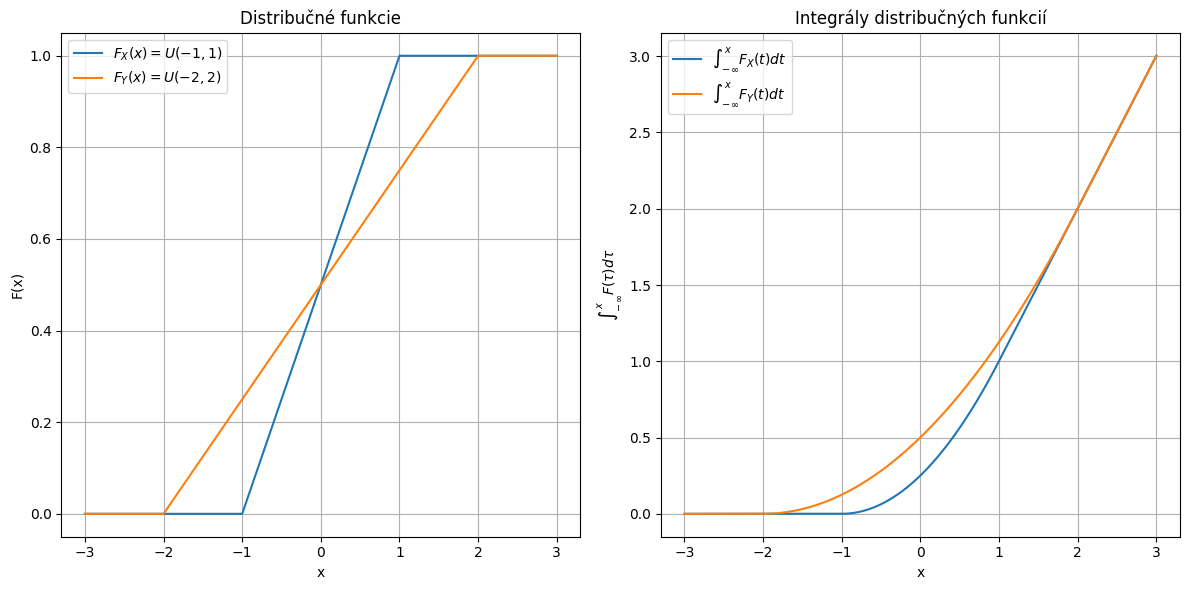

In [7]:
# Definujeme rozdelenia
rvX = uniform(loc=-1, scale=2)   # U(-1,1)
rvY = uniform(loc=-2, scale=4)   # U(-2,2)

# Spočítame E a Var
EX, VarX = rvX.mean(), rvX.var()
EY, VarY = rvY.mean(), rvY.var()
print(f"E[X] = {EX:.2f}, Var(X) = {VarX:.2f}")
print(f"E[Y] = {EY:.2f}, Var(Y) = {VarY:.2f}")

# Vykresľovaná os
x = np.linspace(-3, 3, 1000)
dx = x[1] - x[0]

# Distribučné funckie(CDF)
FX = rvX.cdf(x)
FY = rvY.cdf(x)

# Integrály F (SSD podmienka)
Ix = np.cumsum(FX) * dx     # aproximácia ∫_{-∞}^x F_X(t) dt
Iy = np.cumsum(FY) * dx     # aproximácia ∫_{-∞}^x F_Y(t) dt

# Spoločný graf
plt.figure(figsize=(12, 6))

# graf CDF
plt.subplot(1, 2, 1)
plt.plot(x, FX, label=r'$F_X(x)={U(-1,1)}$', color='C0')
plt.plot(x, FY, label=r'$F_Y(x)={U(-2,2)}$', color='C1')
plt.title('Distribučné funkcie')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)

# graf Integrály
plt.subplot(1, 2, 2)
plt.plot(x, Ix, label=r'$\int_{-\infty}^x F_X(t)dt$', color='C0')
plt.plot(x, Iy, label=r'$\int_{-\infty}^x F_Y(t)dt$', color='C1')
plt.title('Integrály distribučných funkcií')
plt.xlabel('x')
plt.ylabel(r'$\int_{-\infty}^x F(\tau)d\tau$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Výsledky príkladu

V  grafe sme porovnávali dve spojité náhodné premenné  
$
X \sim U(-1,1), \quad Y \sim U(-2,2)
$
ktoré spĺňajú:

1. **Rovnaký priemer**  
   $\displaystyle \mathbb{E}[X] = \mathbb{E}[Y] = 0$

2. **Rôzny rozptyl**  
   $\displaystyle \mathrm{Var}(X) = \frac{(1 - (-1))^2}{12} = \frac{4}{12} \approx 0{,}33$  
   $\displaystyle \mathrm{Var}(Y) = \frac{(2 - (-2))^2}{12} = \frac{16}{12} \approx 1{,}33$

---

### Distribučné funkcie (CDF)

- **$F_X(x)$** (modrá krivka) stúpa od 0 pri $x=-1$ na 1 pri $x=1$.  
- **$F_Y(x)$** (oranžová krivka) stúpa od 0 pri $x=-2$ na 1 pri $x=2$.

Žiadna z týchto dvoch kriviek neprechádza konzistentne pod druhú,
teda **First‐Order Stochastic Dominance (FSD)** neplatí.

---

### Integrály distribučných funkcií (SSD kritérium)

Na pravom grafe vidíme funkcie
$
I_X(x) = \int_{-\infty}^{x} F_X(t)\,\mathrm{d}t
\quad\text{a}\quad
I_Y(x) = \int_{-\infty}^{x} F_Y(t)\,\mathrm{d}t.
$
Pre všetky $x$ platí
$
I_X(x) \;\le\; I_Y(x),
$
čo presne znamená, že **$X$ Second‐Order Stochastically Dominuje $Y$**  
( $X \succeq_2 Y$ ).

---

### Dôsledky SSD a rozptyly

Keďže obe rozdelenia majú rovnaké očakávanie $\mathbb{E}=0$, všeobecný výsledok hovorí:
$
X \succeq_2 Y,\ \mathbb{E}[X] = \mathbb{E}[Y]
\quad\Longrightarrow\quad
\mathrm{Var}(X) \;\le\; \mathrm{Var}(Y).
$
A naozaj:
$
\mathrm{Var}(X) \approx 0{,}33 < 1{,}33 \approx \mathrm{Var}(Y).
$

**Záver pre investora**  
- Oba modely majú rovnaký očakávaný výnos (0).  
- Rozptyl $X$ je omnoho menší, pretože $X$ SSD‐dominuje $Y$.  


Minimálna hodnota ∫[F_Y - F_X]: 5.97e-15
SSD podmienka platí: ∫F_X ≤ ∫F_Y pre všetky x.
E[X]=10.0000, Var(X)=9.4174
E[Y]=10.0000, Var(Y)=322.0696


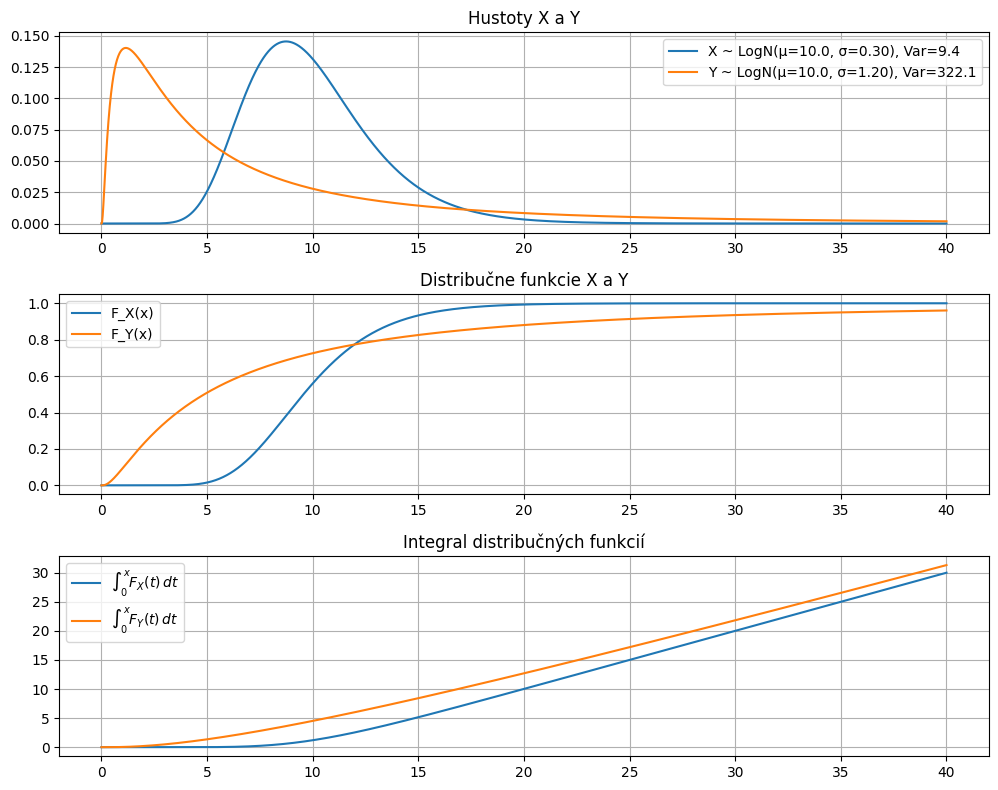

In [8]:
# Zvolený spoločný priemer
M = 10.0

# Parametre lognormálnych rozdelení: menšia sigma pre X, väčšia pre Y
sigma1 = 0.3
sigma2 = 1.2

# Mu sa nastaví tak, aby exp(mu+sigma^2/2) = M
mu1 = np.log(M) - 0.5*sigma1**2
mu2 = np.log(M) - 0.5*sigma2**2

# Definícia rozdelení
distX = lognorm(s=sigma1, scale=np.exp(mu1))
distY = lognorm(s=sigma2, scale=np.exp(mu2))

# Mriežka x
x = np.linspace(0.001, 40, 5000)

# PDF a CDF
fX = distX.pdf(x)
fY = distY.pdf(x)
FX = distX.cdf(x)
FY = distY.cdf(x)

# Numerický výpočet ∫0^x F(t) dt
dx = x[1] - x[0]
I_X = np.cumsum(FX)*dx
I_Y = np.cumsum(FY)*dx
diff = I_Y - I_X

min_diff = np.min(diff)
print(f"Minimálna hodnota ∫[F_Y - F_X]: {min_diff:.2e}")

# Pre istotu vypíšeme aj to, že min_diff >= 0
if min_diff >= -1e-12:
    print("SSD podmienka platí: ∫F_X ≤ ∫F_Y pre všetky x.")
else:
    print("SSD podmienka NEplatí.")

print(f"E[X]={distX.mean():.4f}, Var(X)={distX.var():.4f}")
print(f"E[Y]={distY.mean():.4f}, Var(Y)={distY.var():.4f}")

plt.figure(figsize=(10, 8))

# 1) PDF
plt.subplot(3,1,1)
meanX, varX = distX.mean(), distX.var()
meanY, varY = distY.mean(), distY.var()
plt.plot(x, fX, label=f'X ~ LogN(μ={meanX:.1f}, σ={sigma1:.2f}), Var={varX:.1f}')
plt.plot(x, fY, label=f'Y ~ LogN(μ={meanY:.1f}, σ={sigma2:.2f}), Var={varY:.1f}')
plt.title("Hustoty X a Y")
plt.legend()
plt.grid(True)

# 2)
plt.subplot(3,1,2)
plt.plot(x, FX, label='F_X(x)')
plt.plot(x, FY, label='F_Y(x)')
plt.title("Distribučne funkcie X a Y")
plt.legend()
plt.grid(True)

# 3) ∫0^x CDF
plt.subplot(3,1,3)
plt.plot(x, I_X, label=r'$\int_0^x F_X(t)\,dt$')
plt.plot(x, I_Y, label=r'$\int_0^x F_Y(t)\,dt$')
plt.title("Integral distribučných funkcií")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Výsledky príkladu s lognormálnym rozdelením

V nasledujúcom grafe porovnávame dve lognormálne rozdelenia $X$ a $Y$, ktoré spĺňajú:

1. **Rovnaký priemer**  
   $
     \mathbb{E}[X] = \mathbb{E}[Y] = 10.
   $
2. **Rôzny rozptyl**  
   $
     \mathrm{Var}(X)\approx 9.4,\quad \mathrm{Var}(Y)\approx 322.1.
   $

- **Z distribučných funkcií (CDF)** vidno, že prvý stupeň stochastickej dominancie (FSD) **neplatí** – krivky sa pretínajú.
- **Integrál CDF** (tretí panel) zobrazuje funkcie  
  $
    I_X(x)=\int_0^x F_X(t)\,dt,\quad I_Y(x)=\int_0^x F_Y(t)\,dt.
  $  
  Pre všetky $x$ je  
  $
    I_X(x)\;\le\;I_Y(x),
  $  
  čo presne znamená, že  
  $
    X \succeq_2 Y.
  $

Podľa všeobecného výsledku, že ak $X\succeq_2 Y$ a $\mathbb{E}[X]=\mathbb{E}[Y]$, tak  
$
  \mathrm{Var}(X)\;\le\;\mathrm{Var}(Y),
$  
čo potvrdzujú aj číselné hodnoty ($9.4 \le 322.1$).

> **Záver:**  
> - Obe rozdelenia majú rovnaký očakávaný výnos ($\mathbb{E}[X]=\mathbb{E}[Y]$).  
> - Rozptyl $X$ je omnoho menší, pretože $X$ SSD-dominuje $Y$.  
> - Každý investor s konkávnou (rizikovo averzný) užitkovou funkciou bude preferovať $X$ pred $Y$.
